In [1]:
%tensorflow_version 2.x

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import load_model
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image_dataset

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
! unzip -q '/content/drive/My Drive/Colab Notebooks/test.zip' -d dataset

Load data

In [5]:
def load_data3(path, batch_size, split=False):
    datagen = ImageDataGenerator(rescale=1./255)
    return datagen.flow_from_directory(
            path,
            target_size=(197, 197),
            shuffle=False,
            class_mode='categorical',
            batch_size=batch_size,
            color_mode='rgb')
def load_ds(test_path, batch_size, image_size):
    test_data = image_dataset.image_dataset_from_directory(
            test_path, 
            label_mode='categorical',
            batch_size=batch_size,
            image_size=(image_size, image_size), 
            shuffle=False)
    return test_data

In [7]:
test3_generator128 = load_data3('/content/test', 128)
test3_generator64 = load_data3('/content/test', 64)
test_ds197 = load_ds('/content/test', 128, 197)
test_ds48 = load_ds('/content/test', 128, 48)

Found 5512 images belonging to 7 classes.
Found 5512 images belonging to 7 classes.
Found 5512 files belonging to 7 classes.
Found 5512 files belonging to 7 classes.


Load Models

In [8]:
baseline = load_model("/content/drive/MyDrive/model/Baseline/baseline-EPOCHS_150-DROPOUT_0.3-test_acc_0.675.h5")
vgg16 = load_model("/content/drive/MyDrive/model/VGG16/VGG16_sgd_-EPOCHS_120-DROPOUT_0.5-test_acc_0.683.h5")
resnet18 = load_model("/content/drive/MyDrive/model/Resnet18/RESNET18.h5")
resnet50 = load_model("/content/drive/MyDrive/model/Resnet50/resnet50-weights-best.h5")
senet50 = load_model("/content/drive/MyDrive/model/Senet50/senet50-weights-best.h5")

In [43]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Neutral', 5:'Sad', 6:'Surprise'}

def test_acc_confusion_matrix(model, data, ds=False):
  y_pred_probs = model.predict(data)
  y_pred = y_pred_probs.argmax(axis=1)
  if ds:
    y_true = np.concatenate([np.nonzero(y)[1] for x, y in data], axis=0)
  else:
    y_true = data.classes
  incorrect = np.count_nonzero(y_pred-y_true)
  print("Accuracy on test images: {:.2%}".format(1.0 - incorrect/len(y_true)))

  cmat_df_test=pd.DataFrame(
    confusion_matrix(y_true, y_pred, normalize='true').round(2),
    index=emotions.values(), 
    columns=emotions.values()
    )

  plt.figure(figsize=(5,5))
  heatmap(cmat_df_test,annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.title('Confusion Matrix on Webcam Test Set')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  return 1.0 - incorrect/len(y_true)


Accuracy on test images: 67.51%


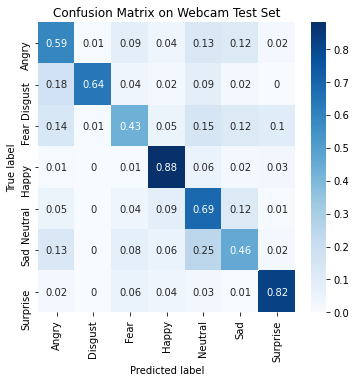

In [50]:
baseline_acc = test_acc_confusion_matrix(baseline, test_ds48, True)

Accuracy on test images: 68.31%


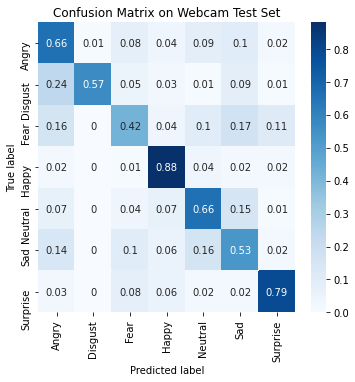

In [48]:
vgg16_acc = test_acc_confusion_matrix(vgg16, test_ds197, True)

Accuracy on test images: 43.45%


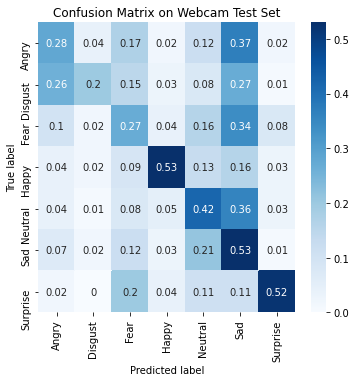

In [53]:
resnet18_acc = test_acc_confusion_matrix(resnet18, test3_generator128)

Accuracy on test images: 68.56%


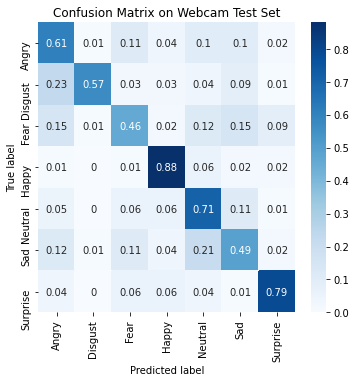

In [49]:
resnet50_acc = test_acc_confusion_matrix(resnet50, test3_generator128)

Accuracy on test images: 62.39%


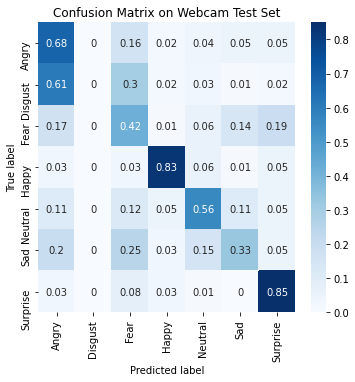

In [51]:
senet50_acc = test_acc_confusion_matrix(senet50, test3_generator64)